# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.0654,  0.6562,  0.2758,  0.0865,  0.3204,  0.4634,  0.2477,  0.8395,  0.0263,  0.9257,
        0.3851,  0.5411,  0.6784,  0.0756,  0.5653,  0.7995,  0.2122,  0.5101,  0.4737,  0.7887,
        0.366 ,  0.7754,  0.0204,  0.1943,  0.2476,  0.631 ,  0.8402,  0.5403,  0.9217,  0.4079])

In [6]:
y

array([  8.1961,   9.9686,   8.8274,   8.2594,   8.9612,   9.3901,   8.7431,  10.5185,   8.0788,
        10.7772,   9.1553,   9.6233,  10.0352,   8.2268,   9.696 ,  10.3984,   8.6366,   9.5304,
         9.4212,  10.3661,   9.0981,  10.3263,   8.0612,   8.5828,   8.7427,   9.893 ,  10.5207,
         9.621 ,  10.765 ,   9.2237])

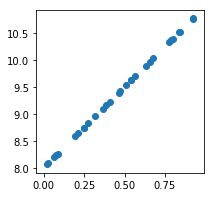

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

8.9199

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [ ]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [ ]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani